# EDA 


## Analyse Phase

##### Locations of the grand Prix since 1950


In [9]:
# importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [11]:
circuit_df = pd.read_csv("data/circuits.csv")
constructor_results_df = pd.read_csv("data/constructor_results.csv")
constructors_df = pd.read_csv("data/constructors.csv")
driver_standings_df = pd.read_csv("data/driver_standings.csv")
drivers_df = pd.read_csv("data/drivers.csv")
lap_times_df = pd.read_csv("data/lap_times.csv")
pit_stops_df = pd.read_csv("data/pit_stops.csv")
qualifying_df = pd.read_csv("data/qualifying.csv")
races_df = pd.read_csv("data/races.csv")
results_df = pd.read_csv("data/results.csv")
seasons_df = pd.read_csv("data/seasons.csv")
sprint_res_df = pd.read_csv("data/sprint_results.csv")
status_df = pd.read_csv("data/status.csv")
tyre_data_df = pd.read_csv("data/tyre_data.csv")
races_with_weather_df = pd.read_csv("data/races_with_weather.csv")
races_with_dummies_df = pd.read_csv("data/races_with_dummies.csv")

In [3]:
#plotting the different locations in a map

#### What's the most important variables to win a Grand Prix?

Our Hypothesis:

__Tyres__

We know tyres play a significant role in the performance of a Formula One car, and tyres will be our target to predict in our modelling part.

But what about the other features?

__Pole Position__

We believe Pole position plays a very important role on some circuits.

Why the Monaco Grand Prix Is F1's Most Boring Race?

The Monaco Grand Prix is a favorite among Formula 1 drivers.

They love the romance, tradition and history of the place. They love the idea of driving at the limit, knowing that a single mistake could ruin a weekend's work. They love the pressure of knowing that their skills behind the wheel can make all the difference.

Indeed, there is much to admire in Monaco from a driving point of view - but what about those of us who don't have that privilege?

For spectators, the Monte Carlo weekend can be considered one of the most boring of the season, to the point of thinking that F1 is starting to outgrow its most famous race.

It's a horrible prospect, but a question worth asking.

One of the reasons is that due to the layout of the circuit, overtaking is almost impossible.

The next graph shows the correlation between the driver in pole position and the winner at the Monaco circuit.


In [7]:
# How many pole positions had Aston Martin drivers had on the last 2 years?

Starting Grid Position

In [ ]:
#Are those 3 first most fast in Q3 were in Podiums? 

In [1]:
# column Q3 vs. winner filtered by Monaco

__Running at Home__

And what is the impact of "running at home"?

Driving in their home country can be attributed to the psychological impact that the support of the fans has on the drivers, as well as the fact that they drive close to home in a familiar context.

Let's see if their is any correlation between these 2 variables

In [2]:
#nationality vs circuit and winner

__Pit Stop__

Let's see how Aston Martin is playing on Pit Stops

Pit Stop Duration by Constructor from 2011

In [ ]:
fig = px.box(newPitStops[newPitStops['seconds']<50].groupby(by=['raceId','raceName','date','constructorName']).mean().reset_index().sort_values(by='seconds',ascending=True),
                 x='constructorName',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Pit Stop Durations by Constructor from 2011 to date',
)
fig.show()


#### Baseline Model

Avoid the multicollinearity

In [6]:
#To avoid or remove multicollinearity in the dataset after one-hot encoding using pd. get_dummies, you can drop one of the categories and hence removing collinearity between the categorical features. Sklearn provides this feature by including drop_first=True in pd. get_dummies.
#Plot a graph to see which variables are very correlated between them and drop those columns before modelling

Ana Hypothesis: 

Qualifiying -> the ones higher up on the grid (1st 4) are more likely to win

In [12]:
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [16]:
qualifying_df.columns.values.tolist()

['qualifyId',
 'raceId',
 'driverId',
 'constructorId',
 'number',
 'position',
 'q1',
 'q2',
 'q3']

In [17]:
drivers_df.columns.values.tolist()

['driverId',
 'driverRef',
 'number',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality',
 'url']

In [18]:
results_df.columns.values.tolist()

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number',
 'grid',
 'position',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId']

In [44]:
results_df.head(30)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [19]:
circuit_df.columns.values.tolist()

['circuitId',
 'circuitRef',
 'name',
 'location',
 'country',
 'lat',
 'lng',
 'alt',
 'url']

In [23]:
races_df.columns.values.tolist()

['raceId',
 'year',
 'round',
 'circuitId',
 'name',
 'date',
 'time',
 'url',
 'fp1_date',
 'fp1_time',
 'fp2_date',
 'fp2_time',
 'fp3_date',
 'fp3_time',
 'quali_date',
 'quali_time',
 'sprint_date',
 'sprint_time']

To check the hypothesis, we will need tp merge 5 tables.
- __qualifying_df__ + __results_df__ based on the columns __race_Id__ and __driver_Id__
- Plus __drivers_Id__ based on the __driver_Id__ column
- Plus __races_df__ based on __raceId__ column
- And last __circuit_df__ based on __circuitId__ column

In [33]:
merged_qualifying_race_results = pd.merge(qualifying_df,results_df, on=['raceId', 'driverId'])

merged_qualifying_race_results_drivers = pd.merge(merged_qualifying_race_results, drivers_df, on='driverId')

merged_data_with_races = pd.merge(merged_qualifying_race_results_drivers, races_df, on='raceId')

final_merged_data = pd.merge(merged_data_with_races, circuit_df, on='circuitId')

print(final_merged_data)


      qualifyId  raceId  driverId  constructorId_x  number_x  position_x   
0             1      18         1                1        22           1  \
1             2      18         9                2         4           2   
2             3      18         5                1        23           3   
3             4      18        13                6         2           4   
4             5      18         2                2         3           5   
...         ...     ...       ...              ...       ...         ...   
9570       2929     270       103               32        11          22   
9571       2927     270       105               18        24          20   
9572       2932     270       101               31        31          25   
9573       2925     270       110               15        29          18   
9574       2931     270       115               33        19          24   

            q1        q2        q3  resultId  constructorId_y number_y  grid   
0     1

In [34]:
final_merged_data.head()

,qualifyId,raceId,driverId,constructorId_x,number_x,position_x,q1,q2,q3,resultId,constructorId_y,number_y,grid,position_y,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number,code,forename,surname,dob,nationality,url_x,year,round,circuitId,name_x,date,time_y,url_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,13,6,2,4,\N,R,13,0.0,29,\N,\N,23,6,1:28.175,216.510,5,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [35]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   qualifyId        9575 non-null   int64  
 1   raceId           9575 non-null   int64  
 2   driverId         9575 non-null   int64  
 3   constructorId_x  9575 non-null   int64  
 4   number_x         9575 non-null   int64  
 5   position_x       9575 non-null   int64  
 6   q1               9567 non-null   object 
 7   q2               9424 non-null   object 
 8   q3               9276 non-null   object 
 9   resultId         9575 non-null   int64  
 10  constructorId_y  9575 non-null   int64  
 11  number_y         9575 non-null   object 
 12  grid             9575 non-null   int64  
 13  position_y       9575 non-null   object 
 14  positionText     9575 non-null   object 
 15  positionOrder    9575 non-null   int64  
 16  points           9575 non-null   float64
 17  laps          

In [37]:
final_merged_data.grid.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 18,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 22, 19, 20, 21, 23, 24,  0, 26, 25])

In [36]:
final_merged_data.isna().sum()

qualifyId            0
raceId               0
driverId             0
constructorId_x      0
number_x             0
position_x           0
q1                   8
q2                 151
q3                 299
resultId             0
constructorId_y      0
number_y             0
grid                 0
position_y           0
positionText         0
positionOrder        0
points               0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
driverRef            0
number               0
code                 0
forename             0
surname              0
dob                  0
nationality          0
url_x                0
year                 0
round                0
circuitId            0
name_x               0
date                 0
time_y               0
url_y                0
fp1_date             0
fp1_time             0
fp2_date             0
fp2_time   

We have some Nan values in our __q3__ column, which is the one we need to check our hypothesis. But, since we have a __grid__ column, we just ignore this __q3__ column.

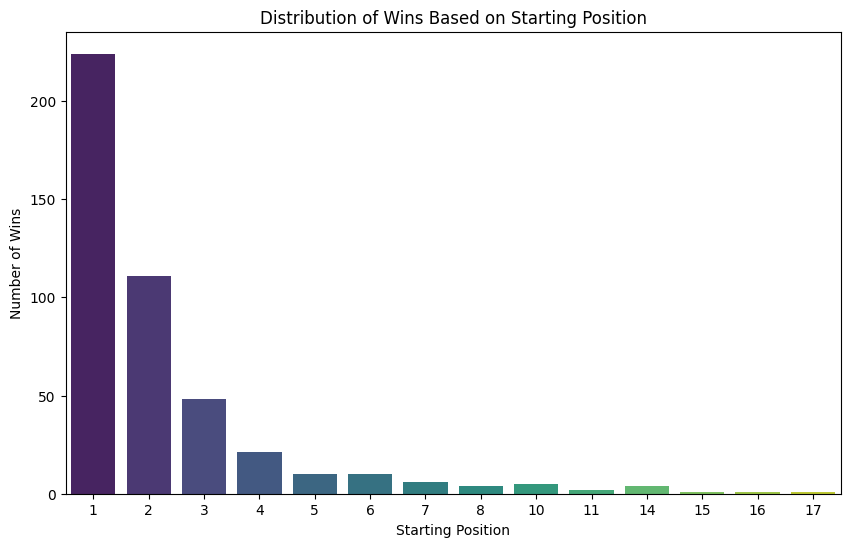

In [41]:
# Filter data for only winning positions
winning_positions_data = final_merged_data[final_merged_data['positionOrder'] == 1]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=winning_positions_data, x='grid', palette='viridis')
plt.xlabel('Starting Position')
plt.ylabel('Number of Wins')
plt.title('Distribution of Wins Based on Starting Position')
plt.xticks(rotation=0)
plt.show()


Let's now filter our data for Fernando Alonso's wins

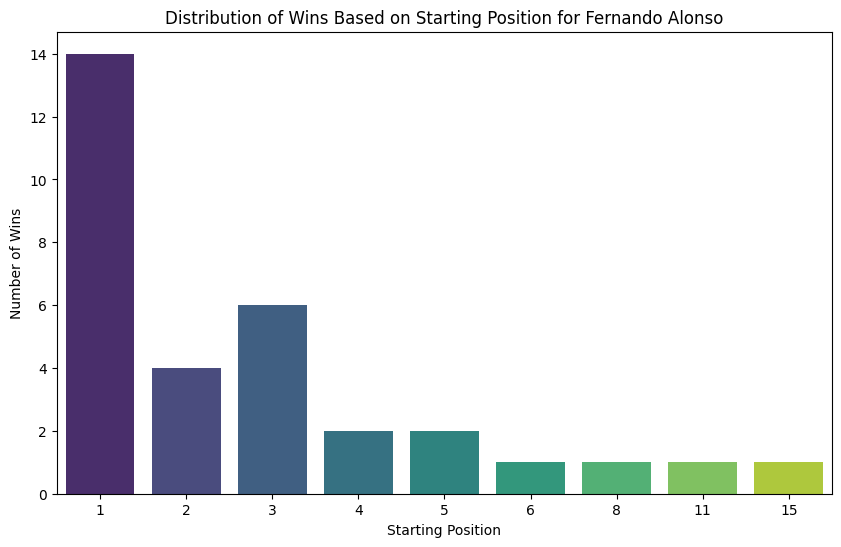

In [47]:
fernando_alonso_wins = final_merged_data[
    (final_merged_data['forename'] == 'Fernando') &
    (final_merged_data['surname'] == 'Alonso') &
    (final_merged_data['positionOrder'] == 1)
]

plt.figure(figsize=(10, 6))
sns.countplot(data=fernando_alonso_wins, x='grid', palette='viridis')
plt.xlabel('Starting Position')
plt.ylabel('Number of Wins')
plt.title('Distribution of Wins Based on Starting Position for Fernando Alonso')
plt.xticks(rotation=0)
plt.show()
